In [1]:
from network_generator import *

total = pd.read_csv('./data/clustering_results.csv')
total

,id,0`,8`,40`,120`,condition,protein,protein.names,gene.symbol,amino.acid,position,sequence,cl,membership
0,13-S149,-1.205462,0.918781,1.054825,-0.768145,EGF_lo,A0A075B6E4,Transcription cofactor vestigial-like protein 4,VGLL4,S,149.0,ALTKNSLDASRPAGLSPTLTPGERQQNRPSV,5,0.769091
1,66-S107,-1.712921,0.424201,0.811027,0.477693,EGF_lo,A0A087WUT6,Eukaryotic translation initiation factor 5B,EIF5B,S,107.0,TSKDKKKKGQKGKKQSFDDNDSEELEDKDSK,2,0.721756
2,166-S118,-1.645030,0.791698,0.815898,0.037434,EGF_lo,A0A087WZH7,Myristoylated alanine-rich C-kinase substrate,MARCKS,S,118.0,VEKEAPAEGEAAEPGSPTAAEGEAASAASST,2,0.801889
3,175-S101,-1.717248,0.502763,0.432885,0.781600,EGF_lo,A0A087WZH7,Myristoylated alanine-rich C-kinase substrate,MARCKS,S,101.0,EKGEPAAAAAPEAGASPVEKEAPAEGEAAEP,2,0.400748
4,252-S987,-1.690181,0.847806,0.607889,0.234486,EGF_lo,F8W7U3,WASH complex subunit FAM21C;Putative WASH comp...,FAM21C,S,987.0,SVPRGPIAQWADGAISPNGHRPQLRAASGED,2,0.845227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,10013-T433,-1.141437,1.585920,-0.426200,-0.018283,FGF_hi,Q9H8Y8,Golgi reassembly-stacking protein 2,GORASP2,T,433.0,TAKAPTTVEDRVGDSTPVSEKPVSAAVDANA,1,0.562865
1157,10122-T1003,1.624833,-0.711123,0.010473,-0.924183,FGF_hi,Q9UQ35,Serine/arginine repetitive matrix protein 2,SRRM2,T,1003.0,SHSGSISPYPKVKAQTPPGPSLSGSKSPCPQ,7,0.727447
1158,10144-T866,0.589775,0.395072,0.734590,-1.719436,FGF_hi,Q9UQ35,Serine/arginine repetitive matrix protein 2,SRRM2,T,866.0,RQGSITSPQANEQSVTPQRRSCFESSPDPEL,7,0.300045
1159,10299-Y204,-1.470548,1.352540,0.034904,0.083104,FGF_hi,P27361,Mitogen-activated protein kinase 3;Mitogen-act...,MAPK3,Y,204.0,RIADPEHDHTGFLTEYVATRWYRAPEIMLNS,1,0.705337


### 1. Identify the representative clusters per condition

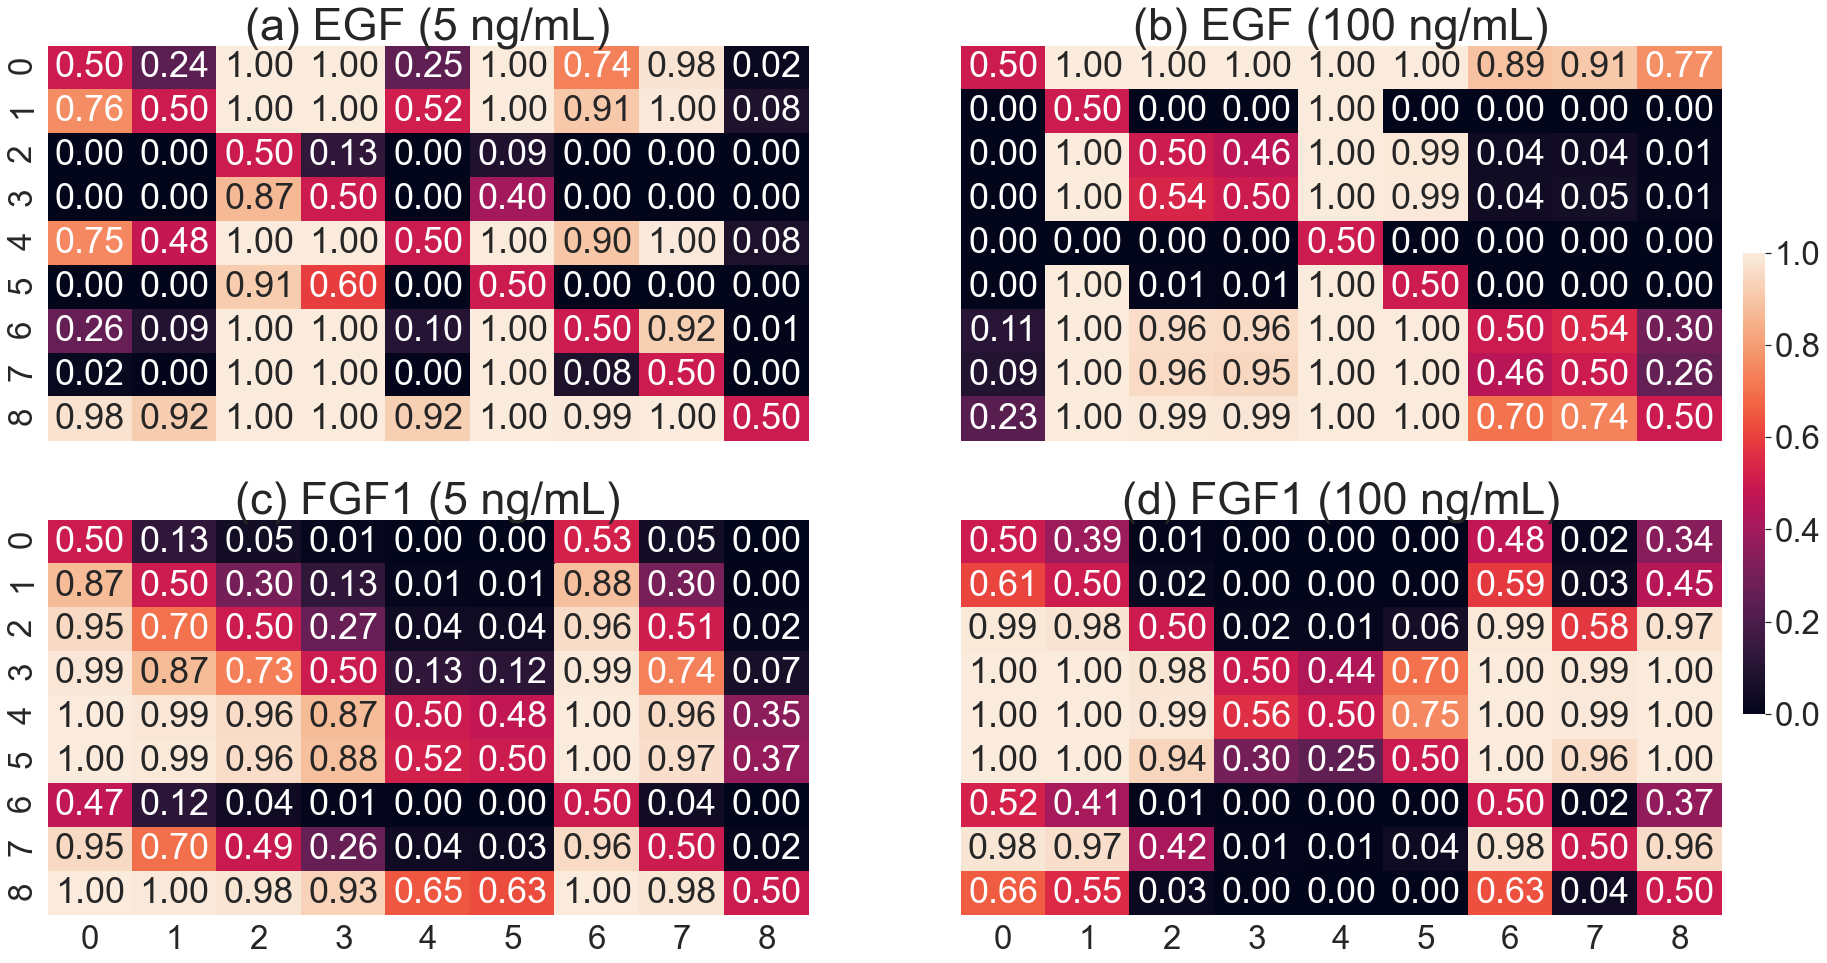

In [2]:
%matplotlib inline
conditions = ['EGF_lo', 'EGF_hi', 'FGF_lo', 'FGF_hi']
titles = ['EGF (5 ng/mL)', 'EGF (100 ng/mL)', 'FGF1 (5 ng/mL)', 'FGF1 (100 ng/mL)']

pval_tables = calc_pval_tables(total, conditions, 9)

sns.set(font_scale = 3)
fig, axn = plt.subplots(2, 2, sharex=True, sharey=True, figsize = (30,16))
cbar_ax = fig.add_axes([.91, .3, .01, .4])
for i, ax in enumerate(axn.flat):
    plot_pval_table(pval_tables[conditions[i]], ax, i, cbar_ax, titles[i])

plt.tight_layout(rect=[0, 0, .91, 1])

In [3]:
EGF_lo = enrich_condition(total[total['condition'] == 'EGF_lo'], pval_tables['EGF_lo'])
EGF_hi = enrich_condition(total[total['condition'] == 'EGF_hi'], pval_tables['EGF_hi'])
FGF_lo = enrich_condition(total[total['condition'] == 'FGF_lo'], pval_tables['FGF_lo'])
FGF_hi = enrich_condition(total[total['condition'] == 'FGF_hi'], pval_tables['FGF_hi'])

### 2. Construct node and edge tables per condition

In [4]:
pred_action_map = {
    (2, 3): 'pred: inhibition',
    (2, 5): 'pred: activation',
    (2, 7): 'pred: early inhibition',
    (3, 5): 'pred: inhibition',
    (3, 7): 'pred: early activation',
    (5, 7): 'pred: early inhibition'
}
same_gene_EGF_lo, edge_EGF_lo, node_EGF_lo = pair_cl_net(EGF_lo, 'EGF_lo', pred_action_map)

Cluster 2 and Cluster 3 contain no same gene.

Cluster 2 and Cluster 5 contain 2 same genes.
Gene list: AHNAK, EGFR

Cluster 2 and Cluster 7 contain no same gene.

Cluster 3 and Cluster 5 contain no same gene.

Cluster 3 and Cluster 7 contain no same gene.

Cluster 5 and Cluster 7 contain no same gene.



In [5]:
pred_action_map = {
    (1, 2): 'pred: early activation',
    (1, 4): 'pred: early inhibition',
    (1, 5): 'pred: early activation',
    (2, 4): 'pred: early inhibition',
    (2, 5): 'pred: activation',
    (4, 5): 'pred: inhibition'
}
same_gene_EGF_hi, edge_EGF_hi, node_EGF_hi = pair_cl_net(EGF_hi, 'EGF_hi', pred_action_map)

Cluster 1 and Cluster 2 contain 1 same genes.
Gene list: MAPK3

Cluster 1 and Cluster 4 contain 2 same genes.
Gene list: ATXN2L, NUFIP2

Cluster 1 and Cluster 5 contain 3 same genes.
Gene list: AHNAK, EGFR, MAPK1

Cluster 2 and Cluster 4 contain no same gene.

Cluster 2 and Cluster 5 contain no same gene.

Cluster 4 and Cluster 5 contain no same gene.



In [6]:
pred_action_map = {
    (0, 6): 'pred: early inhibition'
}
same_gene_FGF_lo, edge_FGF_lo, node_FGF_lo = pair_cl_net(FGF_lo, 'FGF_lo', pred_action_map)

Cluster 0 and Cluster 6 contain no same gene.



In [7]:
pred_action_map = {
    (0, 1): 'pred: inhibition',
    (0, 6): 'pred: early inhibition',
    (0, 8): 'pred: early inhibition',
    (1, 6): 'pred: early activation',
    (1, 8): 'pred: early activation',
    (6, 8): 'pred: early activation'
}
same_gene_FGF_hi, edge_FGF_hi, node_FGF_hi = pair_cl_net(FGF_hi, 'FGF_hi', pred_action_map)

Cluster 0 and Cluster 1 contain no same gene.

Cluster 0 and Cluster 6 contain no same gene.

Cluster 0 and Cluster 8 contain no same gene.

Cluster 1 and Cluster 6 contain 3 same genes.
Gene list: AHNAK, JUNB, MAPK3

Cluster 1 and Cluster 8 contain no same gene.

Cluster 6 and Cluster 8 contain no same gene.



### 3. Import node and edge tables to Cytoscape, the resuts are under folder './conditions'